# Исследование закономерностей успешности игр

В нашем распоряжении данные за 2016 год интернет-магазина «Стримчик», который продаёт компьютерные игры по всему миру. Данные представляют собой информацию о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).

Наша задача - определить закономерности, которые влияют на успешность игры. Это позволит выявить наиболее популярный продукт и сделать на него ставку, а также планировать рекламные компании.

## Содержание
* [Общая информация](#общаяинформация)
* [Подготовка данных](#подготовкаданных)
    * [Приведение столбцов к нижнему регистру](#приведение)
    * [Обработка пропусков](#обработка)
    * [Преобразование типов данных](#преобразование)
    * [Создание столбца](#создание)
* [Исследовательский анализ данных](#анализ_данных)
    * [Исследование количества игр по годам](#игры_по_годам)
    * [Изменение продаж по платформам](#продажи_по_платформам)
    * [Установление актуального периода](#актуальный_период)
    * [Популярность платформ по продажам](#популярность_платформ_продажи)
    * [Глобальные продажи игр в разбивке по платформам](#глобальные_продажи_платформы)
    * [Зависимость между уровнем продаж и отзывами пользователей и критиков](#зависимость)
    * [Общее распределение игр по жанрам](#игры_по_жанрам)
* [Портрет пользователя каждого региона](#портрет_пользователя)
    * [Самые популярные платформы (топ-5)](#популярные_платформы)
    * [Самые популярные жанры (топ-5)](#популярные_жанры)
    * [Влияние рейтинга ESRB на продажи в отдельном регионе](#ESRB)
* [Проверка гипотез](#проверка_гипотез)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#XboxOne_PC)
    * [Средние пользовательские рейтинги жанров Action (англ. "действие", экшен-игры) и Sports (англ. "спортивные соревнования" разные](#Action_Sports)
* [Общий вывод](#общий_вывод)

### Общая информация <a class="anchor" id="общаяинформация"></a>

In [1]:
# загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy import stats as st

In [2]:
# загружаем данные 
data = pd.read_csv('C:\\Users\\kwint\\Desktop\\Data_Analysis\\Yandex.Practicum\\files\\games.csv')

In [3]:
# узнаем общую информацию
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


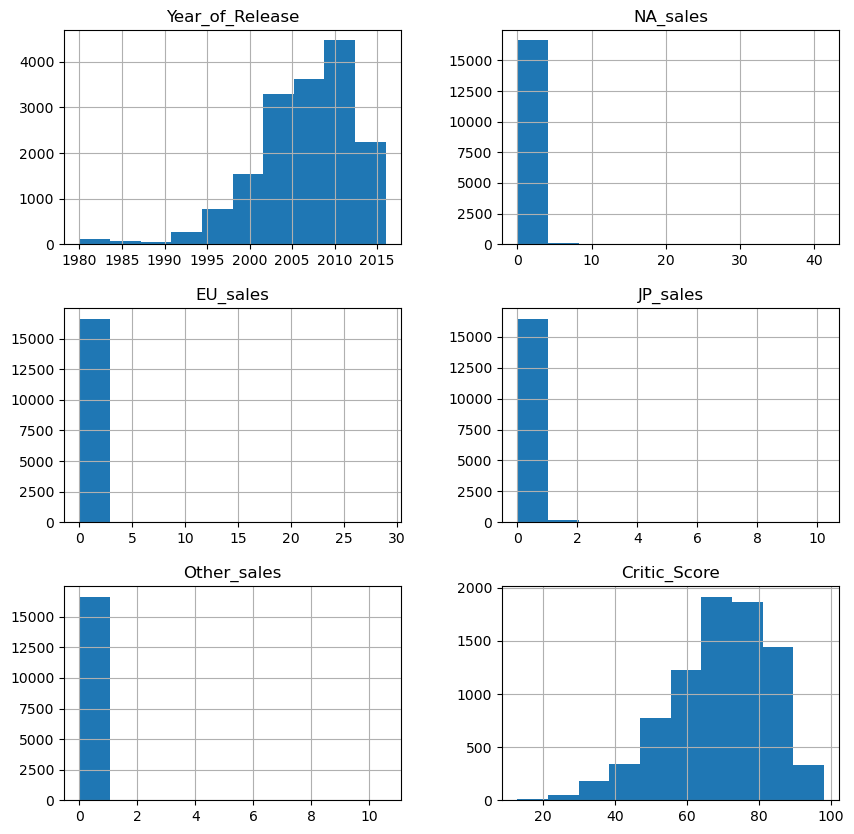

In [4]:
# построим графики для всех числовых значений датафрейма
data.hist(figsize=(10,10))
plt.show()

**Выводы по общей информации**

В данных 16715 строк и 11 столбцов. В некоторых столбцах наблюдаются пропуски. Часть из них можно будет удалить без значительной потери данных. Часть других - обработать, например, те, что касаются оценки критиков (critic_score) или оценки игроков (user_score). 

Гистограммы, иллюстирующие числовые показатели, много информации не дали. Необходимо будет задать другие параметры при дальшейшей работе со столбцами. Некоторые столбцы, где должны были быть числовые показатели, не отображены. Необходимо будет изменить тип данных.

Необходима обработка данных.

### Подготовка данных <a class="anchor" id="подготовкаданных"></a>

#### Приведение столбцов к нижнему регистру <a class="anchor" id="приведение"></a>

In [5]:
#для облегчения последующей работы приведем столбцы к нижнему регистру
data.columns = data.columns.str.lower()

#### Обработка пропусков <a class="anchor" id="обработка"></a>

In [6]:
# вычисляем количество пропущенных значений для каждого столбца
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<AxesSubplot:>

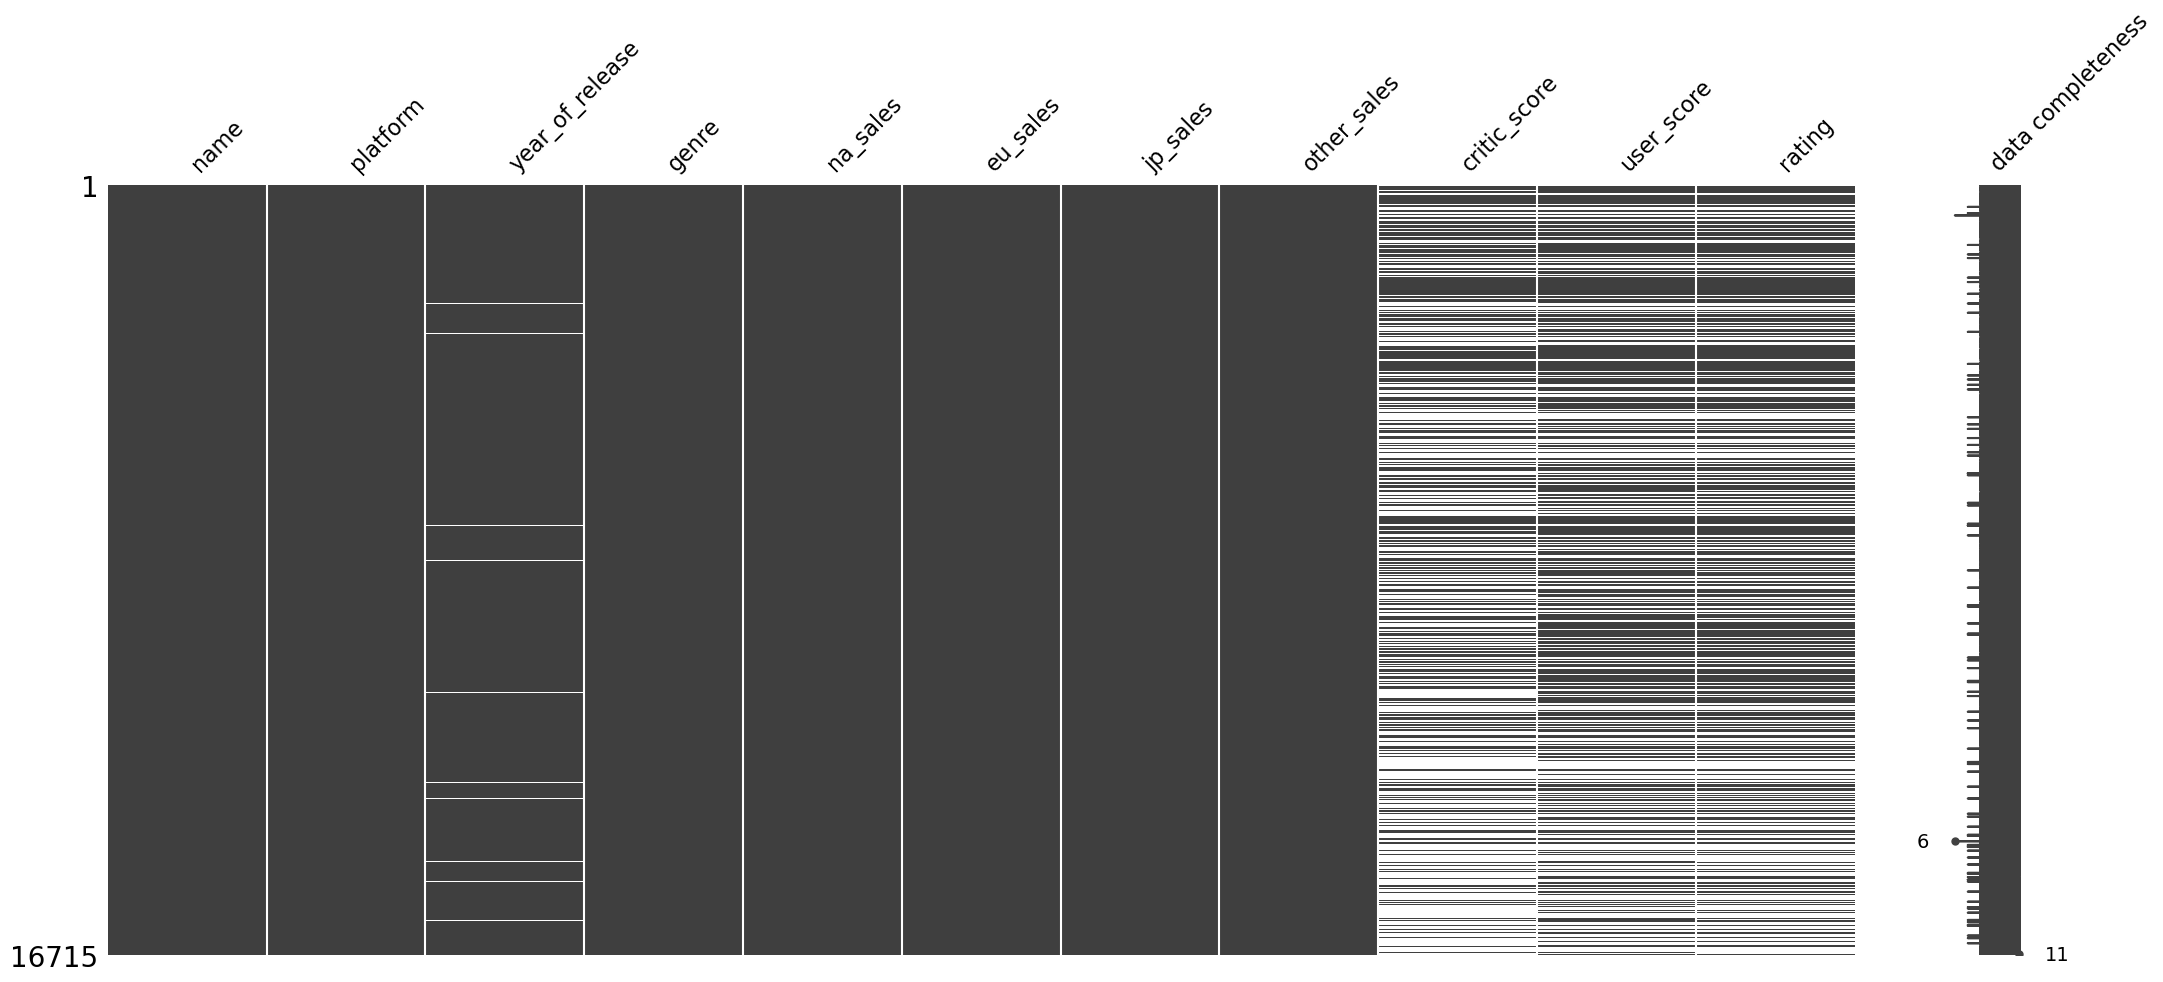

In [7]:
# визуализируем пропуски
msno.matrix(data, labels=True)

**Возможные причины пропусков**

Пропуски в названии и годе выпуска, скорее всего, вызваны технической ошибкой, так как эта информация является основной.

Пропуски же в оценке критиков, оценке игроков и рейтинге ESRB могут быть вызваны отсутсвием данных по этим показателям у указанных игр. У нас нет информации об источниках данных, поэтому все остается на уровне преположений. 

ESRB определяет рейтинг для игр в США и Канаде, поэтому игры, выпущенные в Японии или Европе не подлежат обязательному определению рейтинга этой организацией. 

In [8]:
# удаление пропусков в столбцах, где это удаление не приведет к искажению данных, так как их мало
# и где мы не можем предоставить адекватную замену
data = data.dropna(subset=['name', 'year_of_release'])

Другие пропуски в столбцах critic_score, user_score, rating мы не можем удалить, так как их много. Кроме того, нельзя сделать адекватную замену. Поэтому данные пропуски мы просто оставляем, поставив заглушки, чтобы потом можно было легко отфильтровать. 

Аббревиатура tbd в столбце с оценкой пользователей означает "подлежит уточнению" (англ. to be determined), что может означать отсутствие достаточного количества данных для оценки. Это, в принципе, тоже может считаться пропуском. Поставим заглушки и на tbd.

In [9]:
data['critic_score'] = data['critic_score'].fillna(777)
data['rating'] = data['rating'].fillna(777)

In [10]:
# посмотрим, сколько строк с tbd
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,777.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,777.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,777.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,777.0,tbd,E


In [11]:
# заменим строки с tbd на "заглушки"
data['user_score'] = data['user_score'].replace({'tbd' : 666})
# обработаем и оставшиеся пропуски
data['user_score'] = data['user_score'].fillna(777)

In [12]:
# проверим
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Преобразование типов данных <a class="anchor" id="преобразование"></a>

In [13]:
# преобразуем год из float в int для облегчения работы и подсчетов
data['year_of_release'] = data['year_of_release'].astype('int32')
# преобразуем user_score в float - с числовой переменной легче работать
data['user_score'] = data['user_score'].astype('float32')
# critic_score преобразуем из float в int опять же для облегчения работы
data['critic_score'] = data['critic_score'].astype('int32')

In [14]:
# проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(4), int32(2), object(4)
memory usage: 1.3+ MB


#### Создание столбца <a class="anchor" id="создание"></a>

In [15]:
# создаем столбец с общими продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
# заменим индексы
data = data.reset_index(drop=True)

**Особенности данных**

В "основных" столбцах, связанных с основной информацией об игре и ее продажах, имеется незначительное количество пропусков (менее 2%), которые можно удалить без значительной потери данных. 

Пропуски в столбце critic_score превысили 50%, пропуски в столбце user_score (с учетом tbd) тоже приближены к этому проценту. Пропуски в столбце rating достигают количества примерно 40% от общего объема. Таким образом, данных с информацией о рейтинге о оценке может быть недостаточно для построения выводов, однако наличие этих пропусков может говорить о характере игры: ее популярности, распространенности, и т.д.. 

### Исследовательский анализ данных <a class="anchor" id="анализ_данных"></a>

#### Изучение количества игр по годам <a class="anchor" id="игры_по_годам"></a>

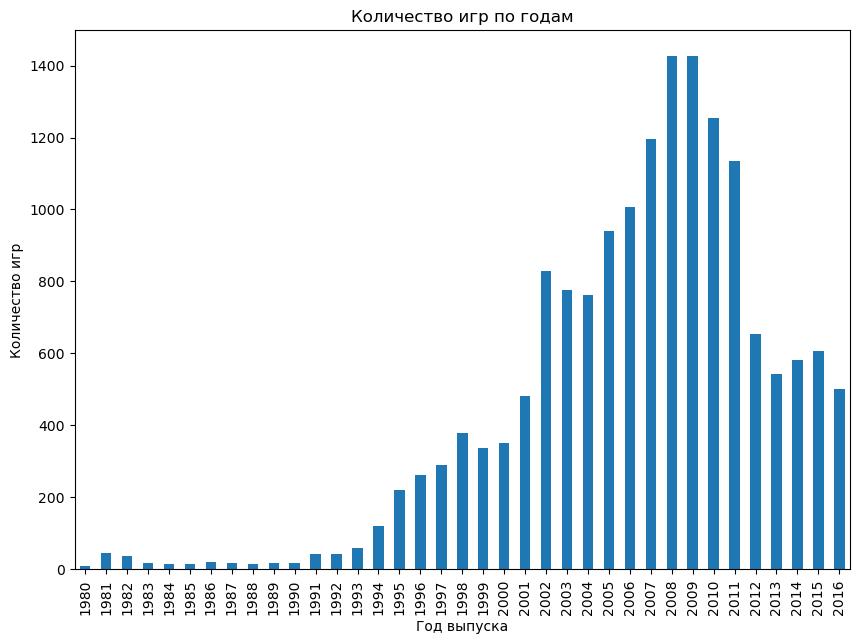

In [17]:
# выпуск игр по годам 
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar',
                                                                               figsize=(10,7),
                                                                               title = 'Количество игр по годам',
                                                                              xlabel='Год выпуска',
                                                                              ylabel='Количество игр',
                                                                              legend='')
plt.show()

Рост числа игр намечается после 2001 года. Примерно в это время также становятся общедоступны персональные компьютеры, что также позволило многим пользователям приобретать игры. Рост числа выпущенных игр идет до 2009 года, а затем намечается спад, причем в 2008 и 2009 годах было выпущено самое большое количество игр за наблюдаемый период - более 1400. В данный период как раз росла популярность персональных компьютеров и приставок, развивался интернет. 

Резкий спад на рынке заметен в 2012 году. Возможно это связано с растущей поплуярностью социальных сетей и мобильных игр. Многие компании как раз в начале 2010-х не смогли справиться с новыми требованиями к играм, что привело их к банкротству и поглощению более крупными компаниями. Это не могло не отразиться на количестве выпускаемых игр. 

#### Изменение продаж по платформам <a class="anchor" id="продажи_по_платформам"></a>

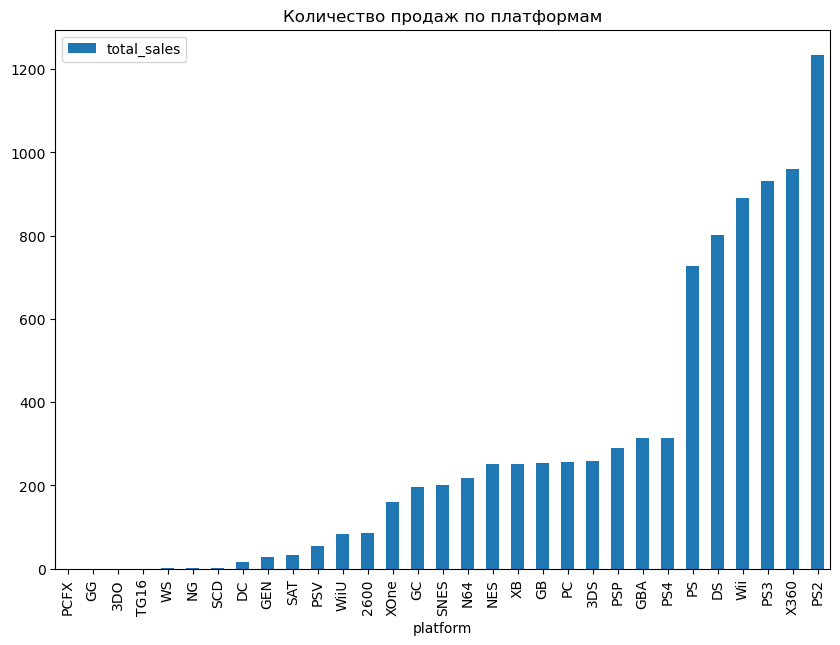

In [18]:
# продажи по платформам
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='bar',
                                                                                                           title = 'Количество продаж по платформам',
                                                                                                          figsize=(10,7))
plt.show()

Наиболее популярной платформой является PS2. За ней идут X360, Wii, PS3, DS и PS (именно эти платформы мы и будем в дальнейшем использовать). Именно эти платформы дольше всего существуют на рынке и наиболее популярны среди пользователей. Платформы "старших поколений" и региональные платформы наименее популярны. 

In [19]:
# выделяем топ-6 самых популярных платформ
popular_platforms = ["PS2", "X360", "Wii", "PS3", "DS", "PS"]

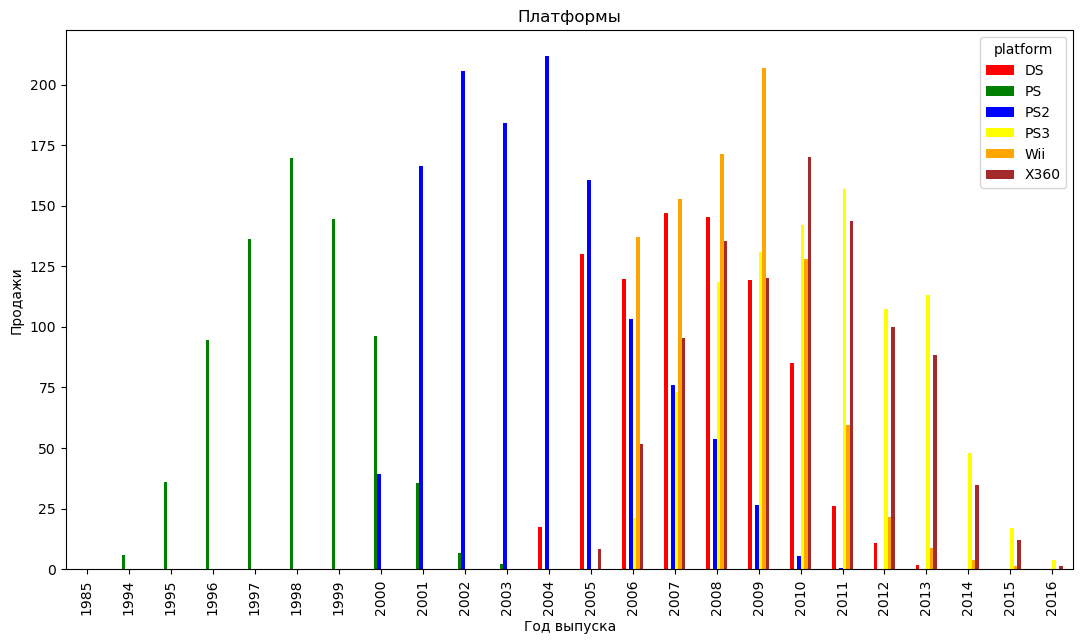

In [20]:
# строим график с продажами по этим платформам
bar_colors = ['red', 'green', 'blue', 'yellow', 'orange', 'brown']
data.query('platform == @popular_platforms').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar',
                                                                                          figsize=(13,7),
                                                                                          color=bar_colors,
                                                                                          xlabel='Год выпуска',
                                                                                          ylabel='Продажи',
                                                                                          title='Платформы')
plt.show()    

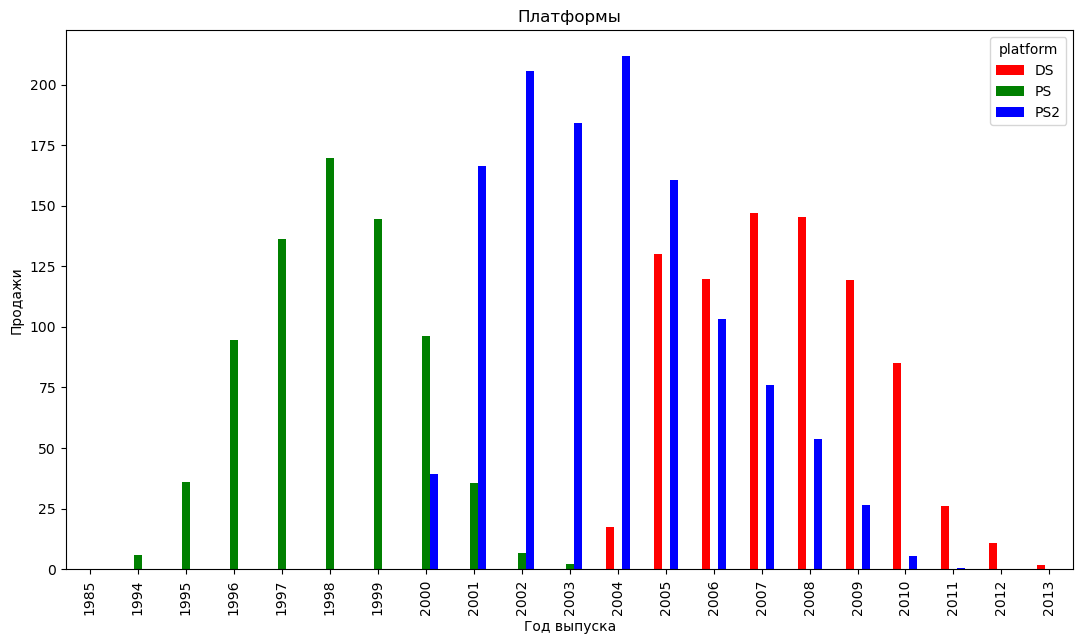

In [21]:
# разобьем график на две части
# построим график для трех самых "старых" платформ
data.query('platform == ["DS", "PS", "PS2"]').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar',
                                                                                          figsize=(13,7),
                                                                                          color=bar_colors,
                                                                                          xlabel='Год выпуска',
                                                                                          ylabel='Продажи',
                                                                                          title='Платформы')
plt.show()      

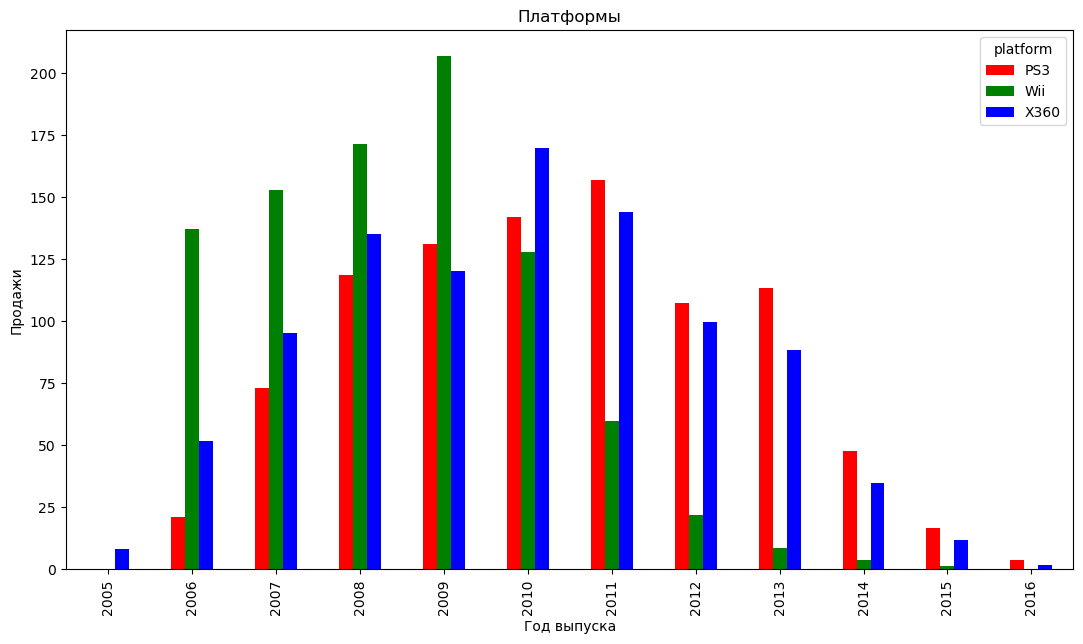

In [22]:
# и для трех оставшихся
data.query('platform == ["Wii", "PS3", "X360"]').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar',
                                                                                          figsize=(13,7),
                                                                                          color=bar_colors,
                                                                                          xlabel='Год выпуска',
                                                                                          ylabel='Продажи',
                                                                                          title='Платформы')
plt.show()   

Судя по графикам, примерно до 2004 года наблюдается полное доминирование двух платформ - PS и PS2, при этом одна сменила другую в течение двух лет. В 2004 появился Nintendo DS, а с 2006 года уже сосущесвуют несколько платформ, популярность которых меняется от года к году. 

Определенная платформа занимает первое место по популярности в течение недолгого времени - примерно 4-5 лет (не берем в расчет PS и PS2, коим не было конкуренции до 2004 года). 

Использование указанных платформ падает с 2012 года (когда и на рынке игр тоже был спад). Стоит присмотреться к другим, которые только набирают популярность с этого периода. 

#### Установление актуального периода <a class="anchor" id="актуальный_период"></a>

В качестве актуального периода берем размах с 2012 по 2016 годы, так как именно в 2012 году начался спад как игр, так и популярности платформ. Плюс "срок жизни" платформы примерно 4-5 лет, так что такой выбранный год в качестве точки отсчета показался подходящим.

In [23]:
data_year = data.query('year_of_release >= 2012')

#### Популярность платформ по продажам <a class="anchor" id="популярность_платформ_продажи"></a>

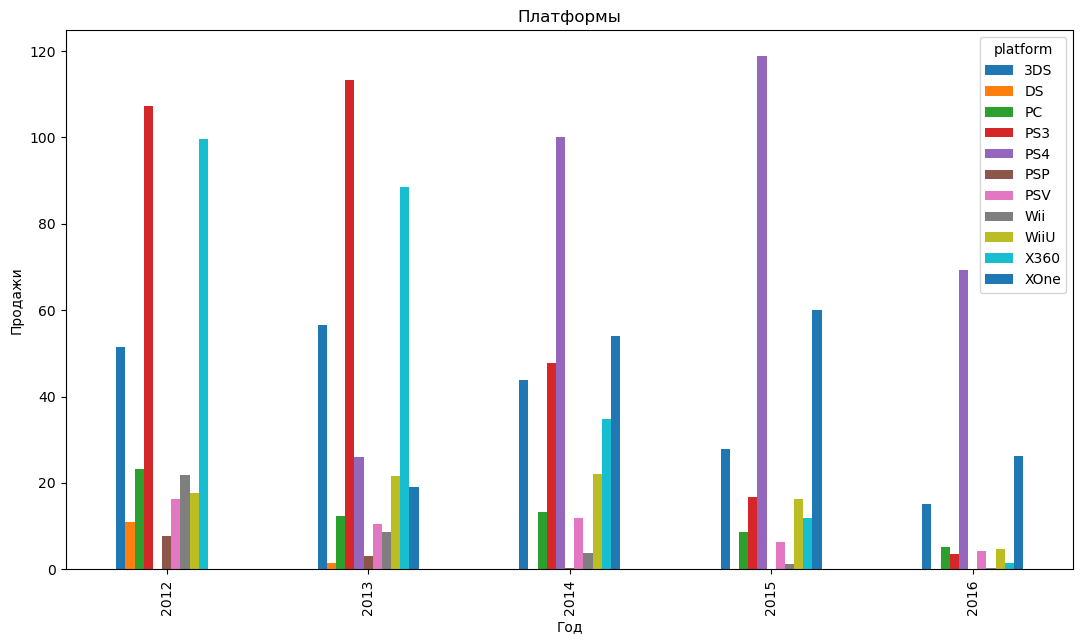

In [24]:
data_year.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar',
                                                                                          figsize=(13,7),
                                                                                          xlabel='Год',
                                                                                          ylabel='Продажи',
                                                                                          title='Платформы')
plt.show()

На этом графике видно, как растет популярность приставок "нового поколения" - PS4, XOne, причем остальные платформы практически не используются. Новинки на рынке приставок становятся наиболее популярными среди пользователей. Это стоит учитывать при разработке стратегии выпуска игр. Приставки PS и Xbox предыдущих поколений все еще пользуются спросом, однако их популярность будет сходить на нет на фоне обновленных версий приставок.

Если учесть, что "срок популярности" платформы - 4-5 лет, то на 2017 год стоит сосредоточиться на PS4, XOne. Nintendo 3DS и WiiU, хоть и популярны в отдельных регионах, могут скоро перестать получать поддержку, однако определенно количество преданных пользователей у них остается.

Про обычный ПК не стоит забывать. Хоть на него продажи небольшие, но они стабильно есть.

In [25]:
data_year = data_year.reset_index(drop=True)

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам <a class="anchor" id="глобальные_продажи_платформы"></a>

In [26]:
# оставляем 5 платформ для дальнейшего анализа c 2012 года
data_2016 = data_year.query('platform == ["PS4", "XOne", "PC", "3DS", "WiiU"]')

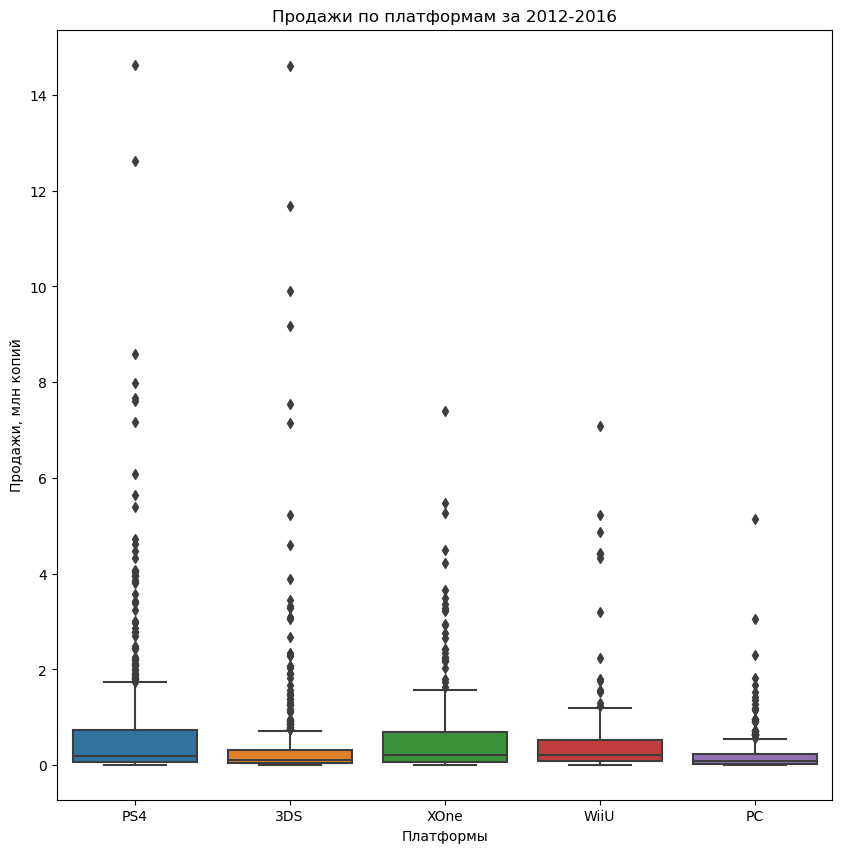

In [27]:
# строим "ящик с усами" для платформ по продажам
plt.figure(figsize=(10,10))
sns.boxplot(data=data_2016, x='platform', y='total_sales').set(
    title='Продажи по платформам за 2012-2016', xlabel='Платформы', ylabel='Продажи, млн копий')
plt.show()

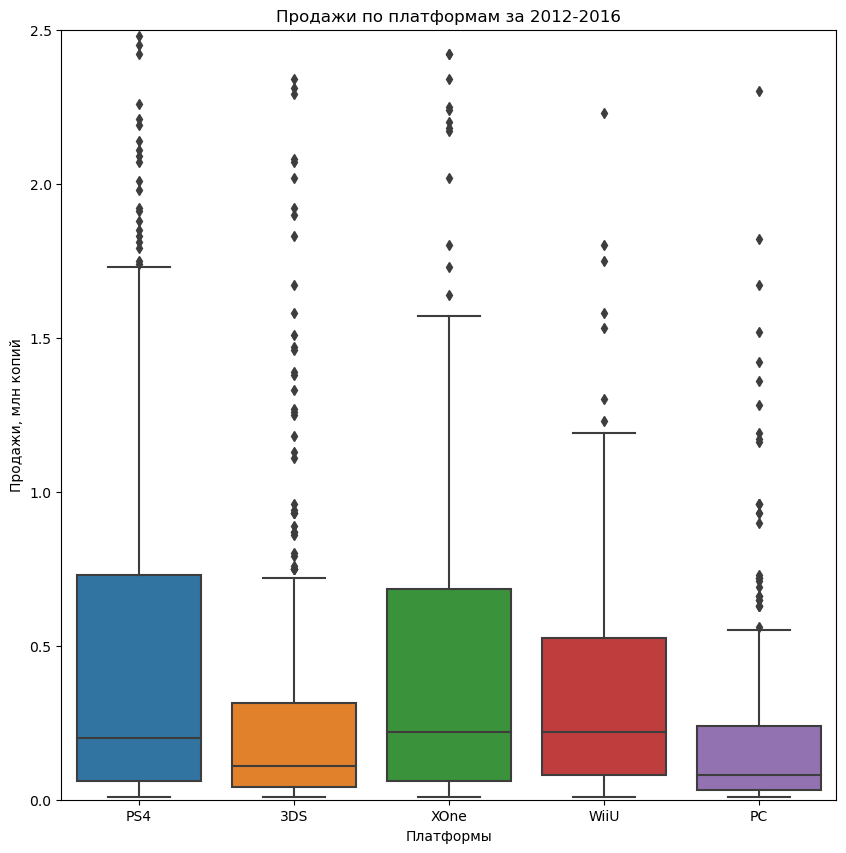

In [28]:
# Сделаем график поменьше по оси ординат, чтобы убрать выбросы и увидеть более четкую картину
plt.figure(figsize=(10,10))
sns.boxplot(data=data_2016, x='platform', y='total_sales').set(
    title='Продажи по платформам за 2012-2016', xlabel='Платформы', ylabel='Продажи, млн копий', ylim=(0,2.5))
plt.show()

In [29]:
data_2016.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PC,250.0,0.250600,0.494640,0.01,0.03,0.08,0.2400,5.14
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


За указанный период больше всего игр было создано и продано для 3DS (396), затем следует набирающая популярность в эти годы PS4(392). Последнее место занимает WiiU, что логично, так как эта модель уже устаревшая, и ей на смену готовится другая. 

Среднее на всех платформах примерно одинаковое - в районе 0.5 млн, кроме PC (0.2 млн), однако на графике заметны большие вбросы (очень популярные или очень непопулярные игры), что отображается в стандартном отклонении. У PS4 оно достигает 1.3 млн. И максимальное количество проданных копий на PS4 у игры - 12.25 млн, в то время как максимальное у PC - 4.6 млн.

Медиана у платформ несильно различается, и опять же самое большое количество популярных игр у новеньких XOne и PS4.

#### Зависимость между уровнем продаж и отзывами пользователей и критиков <a class="anchor" id="зависимость"></a>

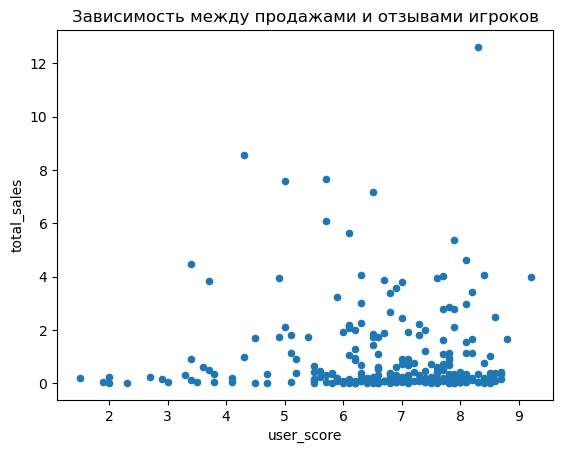

In [30]:
# график зависимости между продажами и отзывами игроков
# в качестве платформы выбираем PS4 как самую популярную и быстрорастущую
ps_user = data_2016.query('platform == "PS4" and user_score != [666, 777, 0]')
ps_user.plot(x='user_score', y='total_sales', kind='scatter', title = 'Зависимость между продажами и отзывами игроков')
plt.show()

In [31]:
# вычисляем корреляцию между оценками пользователей и продажами
ps_user['user_score'].corr(ps_user['total_sales'])

-0.031957109005188264

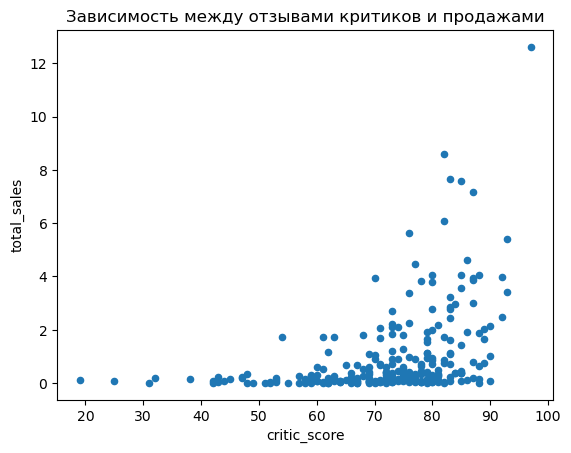

In [32]:
# график зависимости между отзывами критиков и продажами
ps_critic = data_2016.query('platform == "PS4" and critic_score != [777, 0]')
ps_critic.plot(x='critic_score', y='total_sales', kind='scatter', title='Зависимость между отзывами критиков и продажами')
plt.show()

In [33]:
# корреляция между оценками критиков и продажами
ps_critic['critic_score'].corr(ps_critic['total_sales'])

0.40656790206178095

Между оценками критиков и продажами есть положительная зависимость (0.4), в то время как оценки пользователей на продажи не влияют. 

In [34]:
# корреляция для 3DS
ds_user = data_2016.query('platform == "3DS" and user_score != [666, 777, 0]')
print('Корреляция между продажами и оценками пользователей:', ds_user['user_score'].corr(ds_user['total_sales']))
ds_critic = data_2016.query('platform == "3DS" and critic_score != [777, 0]')
print('Корреляция между продажами и оценками критиков:', ds_critic['critic_score'].corr(ds_critic['total_sales']))

Корреляция между продажами и оценками пользователей: 0.19758261153521017
Корреляция между продажами и оценками критиков: 0.3208028695360785


In [35]:
# корреляция для PC
pc_user = data_2016.query('platform == "PC" and user_score != [666, 777, 0]')
print('Корреляция между продажами и оценками пользователей:', pc_user['user_score'].corr(pc_user['total_sales']))
pc_critic = data_2016.query('platform == "PC" and critic_score != [777, 0]')
print('Корреляция между продажами и оценками критиков:', pc_critic['critic_score'].corr(pc_critic['total_sales']))

Корреляция между продажами и оценками пользователей: -0.12186748061872194
Корреляция между продажами и оценками критиков: 0.23724324311567915


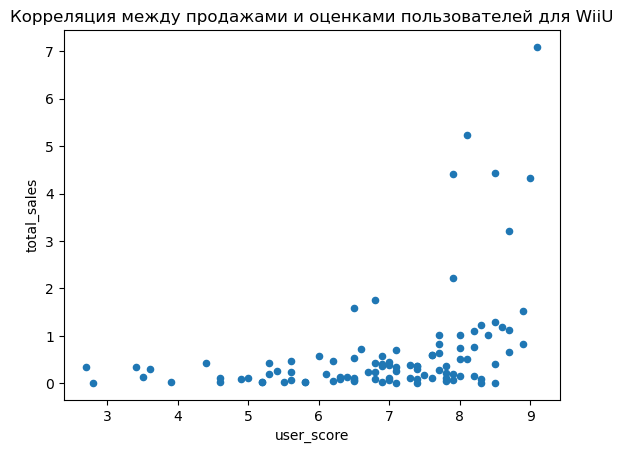

Корреляция между продажами и оценками пользователей: 0.4002190377710612


In [36]:
#корреляция для WiiU
wii_user = data_2016.query('platform == "WiiU" and user_score != [666, 777, 0]')
wii_user.plot(x='user_score', y='total_sales', kind='scatter', title = 'Корреляция между продажами и оценками пользователей для WiiU')
plt.show()
print('Корреляция между продажами и оценками пользователей:', wii_user['user_score'].corr(wii_user['total_sales']))

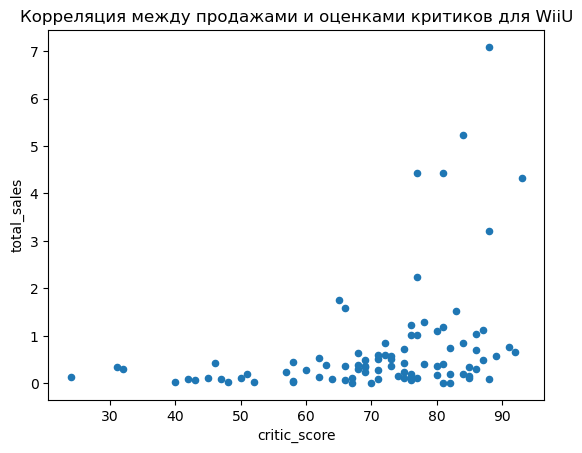

Корреляция между продажами и оценками критиков: 0.34837976012017485


In [37]:
wii_critic = data_2016.query('platform == "WiiU" and critic_score != [777, 0]')
wii_critic.plot(x='critic_score', y='total_sales', kind='scatter', title = 'Корреляция между продажами и оценками критиков для WiiU')
plt.show()
print('Корреляция между продажами и оценками критиков:', wii_critic['critic_score'].corr(wii_critic['total_sales']))

In [38]:
# Корреляция для XOne
xone_user = data_2016.query('platform == "XOne" and user_score != [666, 777, 0]')
print('Корреляция между продажами и оценками пользователей:', xone_user['user_score'].corr(xone_user['total_sales']))
xone_critic = data_2016.query('platform == "XOne" and critic_score != [777, 0]')
print('Корреляция между продажами и оценками критиков:', xone_critic['critic_score'].corr(xone_critic['total_sales']))

Корреляция между продажами и оценками пользователей: -0.06892505319711206
Корреляция между продажами и оценками критиков: 0.4169983280084017


**PS4**

- положительная корреляция между оценками критиков и продажами (0.4)
- корреляция между оценками пользователей и продажами отсутствует (-0.03)

**3DS**

- небольшая положительная корреляция между оценками критиков и продажами (0.32)
- незначительная положительная корреляция между оценками пользователей и продажами (0.2)

**PC**

- незначительная положительная корреляция между оценками критиков и продажами (0.23)
- практически отсутствие корреляции между оценками пользователей и продажами (-0.1)

**WiiU**

- положительная корреляция между оценками критиков и продажами (0.35)
- положительная корреляция между оценками пользователей и продажами (0.4)

**XOne**

- положительная корреляция между оценками пользователей и продажами (0.4)
- отсутствие корреляции между оценками пользователей и продажами (-0.06)

Ситуация PS4 типична для всех остальных платформ, особенно для XOne - то есть для приставок нового поколения. Их пользователи больше доверяют критикам и совсем не доверяют оценкам других игроков. 

Особняком стоят покупатели игр на WiiU, которые также доверяют оценкам других пользователей. Возможно, это связано с тем, что из представленных WiiU является самой "старой" платформой и отзывов игроков больше, и они более проверенные.  

#### Общее распределение игр по жанрам <a class="anchor" id="игры_по_жанрам"></a>

In [39]:
# распределение продаж по жанрам
data_2016.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.440
Sports,0.260
Platform,0.245
Role-Playing,0.205
Fighting,0.155
Misc,0.150
Action,0.130
Racing,0.120
Simulation,0.120


Получается, что самыми лучшими жанрами по продажам являются Shooter, Sports, Platform, Role-Playing и Fighting, если брать медиану продаж. В то время как хуже всего продаются игры жанра Puzzle и Adventure.

In [40]:
# количество игр в каждом жанре
data_2016.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)

,name
genre,
Action,515
Role-Playing,178
Shooter,132
Sports,121
Misc,107
Adventure,95
Racing,63
Platform,56
Simulation,54


Больше всего копий продано в жанрах shooter, sports, platform и role-playing. Однако больше всего игр было выпущено в жанрах Action, Role-Playing и Shooter. Выпускать Action не очень выгодно, в то время как Fighting или Platform, несмотря на небольшое количество игр, хорошо показали себя в продажах. 

Adventure и puzzle хуже всего продаются, хотя игр в жанре приключений выпускается достаточное количество.

**Выводы**

- Рост популярности платформенных игр начинается в начале 2000-х и достигает пика к концу этого десятилетия. Затем намечается спад, который продолжается до конца исследуемого периода. 
- Наиболее популярными платформами на основе имеющихся данных являются PS2, X360, Wii, PS3, DS и PS. Однако для интересующего нас периода (с 2012 года) самыми популярными были PS4, XOne. Nintendo 3DS и WiiU. 
- Что касается заивсимости между продажами игр и оценками пользователей и критиков, то напрямую на продажи практически для всех платформ оказывают оценки критиков. Оценки пользователй практически не влияют на этот показатель за исключением WiiU.
- Наиболее выгодными жанрами по продажам являются Shooter, Sports, Platform, Role-Playing и Fighting,  по количеству выпускаемых игр лидируют Action, Role-Playing и Shooter. Наименее выпускаемый - жанр puzzle. Наименее продаваемые - жанры puzzle и Adventure. 

### Портрет пользователя каждого региона <a class="anchor" id="портрет_пользователя"></a>

#### Самые популярные платформы (топ-5) <a class="anchor" id="популярные_платформы"></a>

In [41]:
# самые популярные платформы для регионов c 2012 года
# сводные таблицы по регионам
na_sales = data_year.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
eu_sales = data_year.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
jp_sales = data_year.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

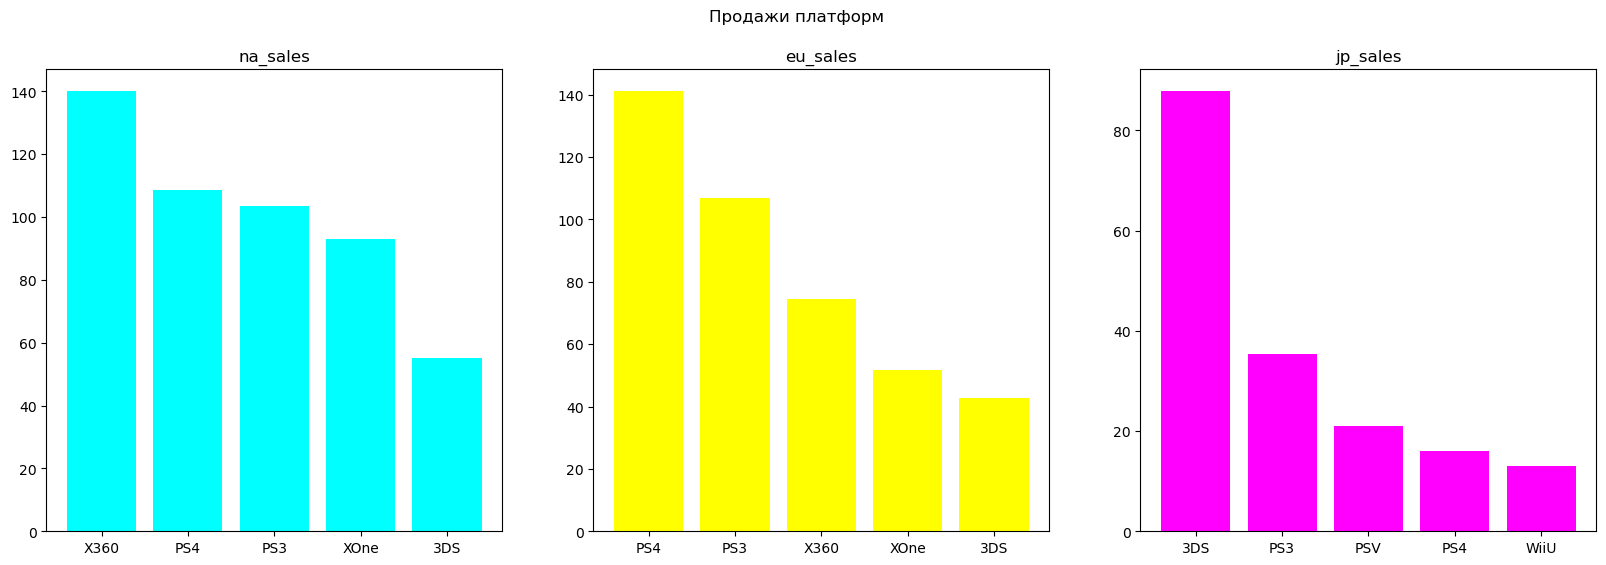

In [42]:
# строим графики
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Продажи платформ')
ax1.bar(na_sales.index, na_sales['na_sales'], color='cyan')
ax1.set_title('na_sales')
ax2.bar(eu_sales.index, eu_sales['eu_sales'], color='yellow')
ax2.set_title('eu_sales')
ax3.bar(jp_sales.index, jp_sales['jp_sales'], color='magenta')
ax3.set_title('jp_sales')
plt.show()

Больше всего игр продается в Северной Америке, затем следует Европа, а в конце - Япония с примерно 90 млн. копий продаж. 

Разброс по платформам достаточно большой. В Северной Америке предпочитают X360 (140 млн. копий продаж), затем следуют PS4 и PS3. Замыкает пятерку 3DS. В Японии же 3DS практически в 2 раза популярнее, чем PS3 и другие приставки. 

Европейские пользователи предпочитают PS4 и PS3. X360 и XOne следуют за продукцией Sony.

#### Самые популярные жанры (топ-5) <a class="anchor" id="популярные_жанры"></a>

In [43]:
# самые популярные жанры
na_genre = data_year.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
eu_genre = data_year.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
jp_genre = data_year.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

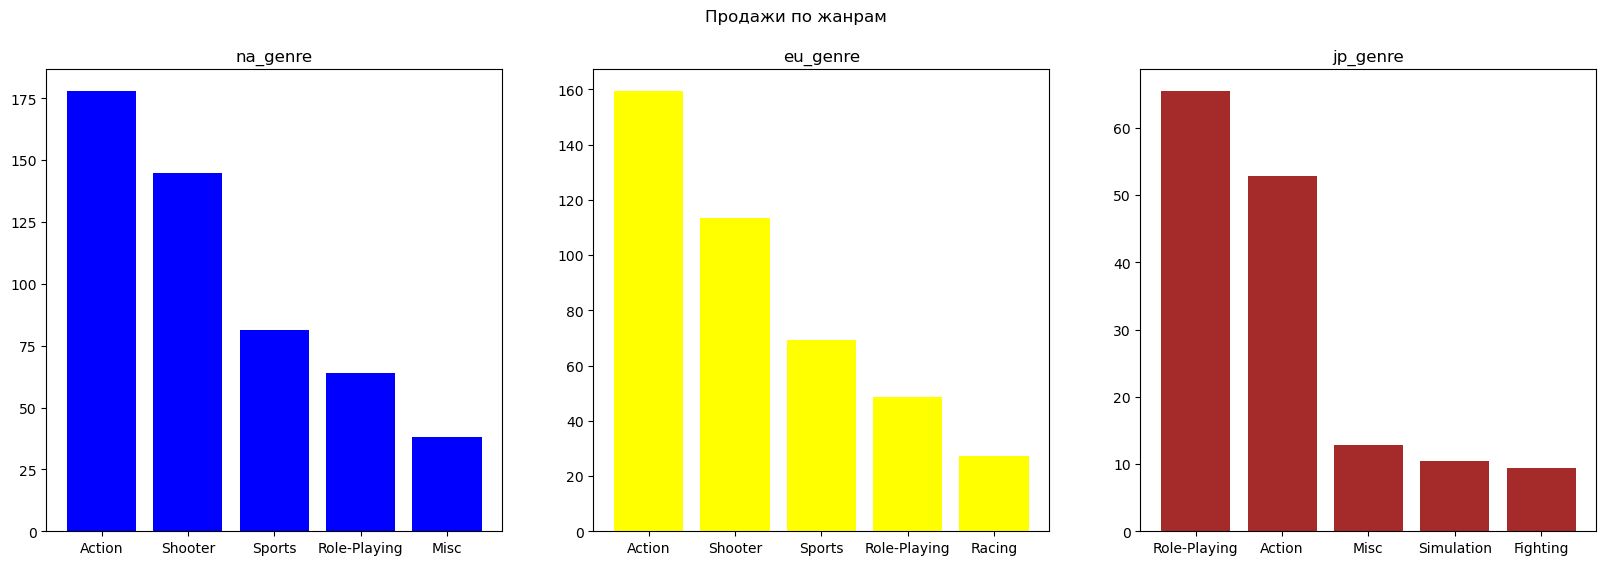

In [44]:
# строим графики
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Продажи по жанрам')
ax1.bar(na_genre.index, na_genre['na_sales'], color='blue')
ax1.set_title('na_genre')
ax2.bar(eu_genre.index, eu_genre['eu_sales'], color='yellow')
ax2.set_title('eu_genre')
ax3.bar(jp_genre.index, jp_genre['jp_sales'], color='brown')
ax3.set_title('jp_genre')
plt.show()

Самый популярные жанры в Европе и Северной Америке практически совпадают, кроме 5 места (в Европе это Racing, в Америке - Misc). Топ-3 - Action, Shooter и Sports. Эти же жанры были в 5 самых популярных по всем продажам. 

В топ-5 также входил Role-Playing, который занимает первое место по продажам в Японии (около 70 млн. копий). Жанра SHooter вообще нет. Action идет на втором месте. 

#### Влияние рейтинга ESRB на продажи в отдельном регионе <a class="anchor" id="ESRB"></a>

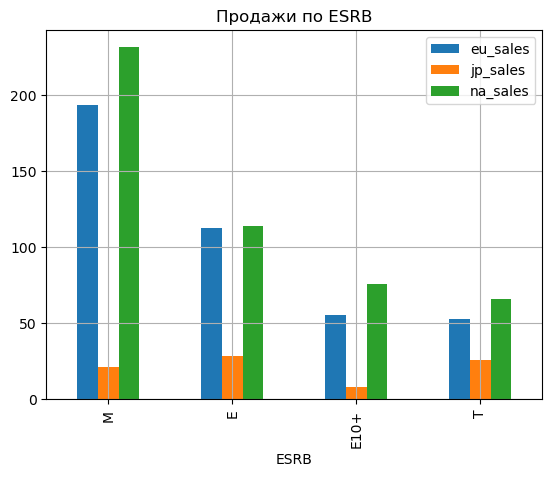

In [45]:
# влияние рейтинга ESRB на продажи в отдельном регионе
data_year.query('rating != 777').pivot_table(
    index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').sort_values(
    by='na_sales', ascending=False).plot(kind='bar', title='Продажи по ESRB', xlabel='ESRB', grid=True)
plt.show()

**M** ("Mature") - Для взрослых

**E** ("Everyone") - Для всех

**E10+** ("Everyone 10 and older") - Для всех от 10 лет и старше

**T** ("Teen") - Подросткам (от 13 лет)

В Северной Америке и Европе ситуация по продажам с соответствии с рейтингом примерно одинаковая: больше всего игр продается для взрослых (230 млн. в Америке и около 200 в Европе). Примерно в два раза меньше продается игр для всех. Затем идут от 10 и старше и последнее место по продажам занимают игры с возрастным рейтингом для подростков. 

В Японии ситуация отличается. Наиболее популярными играми являются игры с рейтингом E и Т (примерно по 25 млн. копий). Затем идут игры для взрослых. И на последнем месте игры E10+. 

**Портрет пользователя из Северной Америки**

Средний пользователь из Америки предпочитает играть в Action, Shooter и Sports на X360 или PS4. Причем игры в большинстве своем будут иметь рейтинг M (для взрослых).

**Портрет пользователя из Европы**
Средний европеец также играет в Action, Shooter и Sports с рейтингом М, однако предпочитает пользоваться PS4 или PS3.

**Портрет пользователя из Японии**

Японцы же сильно отличаются от предыдущих пользователей. Они предпочитают играть в Role-Playing или Action на 3DS, произведенной в Японии и ориентированной на японских пользователей. Игры японцев в большинстве своем обладают рейтингом E или T, т.е. подходят практически всем. 

### Проверка гипотез <a class="anchor" id="проверка_гипотез"></a>

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a class="anchor" id="XboxOne_PC"></a> 

H_0: Оценки пользователей (user_score) платформы XOne = оценкам пользователей (user_score) платформы PC

H_a: Оценки пользователей (user_score) платформы XOne ≠ оценкам пользователей (user_score) платформы PC

In [46]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
data_year.query('user_score != [777, 666] and platform == "XOne"')['user_score'],
    data_year.query('user_score != [777, 666] and platform == "PC"')['user_score']
)
alpha = 0.05

print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5535102819461235
Не получилось отвергнуть нулевую гипотезу


У нас не получилось отвергнуть нулевую гипотезу. Так что предполагаем, что средние пользовательские оценки для платформ XOne и PC примерно одинаковые. 

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные <a class="anchor" id="Action_Sports"></a> 

H_0: Оценки пользователей (user_score) для жанра Action = оценкам пользователей (user_score) жанра Sports

H_a: Оценки пользователей (user_score) для жанра Action ≠ оценкам пользователей (user_score) жанра Sports

In [47]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
data_year.query('user_score != [777, 666] and genre == "Action"')['user_score'],
    data_year.query('user_score != [777, 666] and genre == "Sports"')['user_score']
)
alpha = 0.05

print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

3.716101071226201e-26
Отвергаем нулевую гипотезу


В соответствии с результатами проверки мы можем отвергнуть нулевую гипотезу и предположить, что альтернативная гипотеза верна, т.е. средние пользовательские рейтинги жанров Action и Sports возможно действительно отличаются.

**Выводы**

С помощью t-теста удалось ответить на вопросы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Скорее всего, это действительно так.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Судя по всему, так и есть. Ответ на этот вопрос также положительный. 

Мы использовали t-test для проверки гипотезы о равнестве среднего двух генеральных совокупностей по взятым из них выборкам, так как соблюдены необходимые для выполнения этого теста условия. Мы можем предположить, что выборочные средние нормально распределены, поскольку у нас большой объем выборок, и выборки примерно одинаковые. 

### Общий вывод <a class="anchor" id="общий_вывод"></a> 

В рамках проекта было проведено исследование по выявлению закономерностей, которые влияют на успешность продаж компьютерных игр. В качетстве основы для анализа были использованы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Проект служит возможности прогнозирования успешности продукта и планированию рекламных компаний.

**Особенности данных**

Данные имеют большое количество пропусков в столбцах critic_score, user_score (с учетом tbd ("to be determined"), что мы посчитали также за пропуски) - около 50%. Пропуски в столбце rating достигают количества примерно 40% от общего объема. Также было обнаружено несоответствие типов данных. 

**Основные выводы**

- Рост числа игр начинается в начале 2000-х годов и продлолжается до 2008-2009 годов, когда достигает своего пика, но затем намечается спад. Индустрия немного "просела" под наплывов популярности социальных сетей и мобильных игр. Конкуренция и новые требования в самом рынке также повлияли на падение продаж и выпуска игр.
- На протяжении всего периода, определенного в данных, наиболее популярными платформами являлись  PS2, X360, Wii, PS3, DS и PС. Однако в интересующий нас отрезок времени - с 2012 года - другие платформы выходят на передний план. Срок их жизни и популярности не так уж и велик, так что на 2016 г. самыми популярными стали PS4, XOne, PC, 3DS, WiiU. Именно эти платформы были выбраны для дальнейшего исследования.
- Больше всего продаж у PS4 и XOne, как у самых "молодых" платформ. Однако у 3DS тоже есть очень популярные игры. Эта платформа также стала рекордсменом по количеству выпущенных игр в исследуемый период.
- Зависимость продаж от оценок пользователей практически отсутствует. Только WiiU является исключением. 
- Зависимость продаж от оценкок критиков присутствует. Чем выше оценка, тем выше продажи. Однако корреляция небольшая. 
- Наиболее выгодными жанрами по продажам являются Shooter, Sports, Platform, Role-Playing и Fighting,  по количеству выпускаемых игр лидируют Action, Role-Playing и Shooter. Наименее выпускаемый - жанр puzzle. Наименее продаваемые - жанры puzzle и Adventure. 
- Портрет среднего американца и европейца, в целом, схож. Они предпочитают одинаковые жанры в играх (Action, Shooter и Sports) с одинаковым возрастным рейтингом (для взрослых). Однако в Северной Америке продажи выше, чем в Европе, и американцы предпочитают Xbox, в то время как европейцы - PS. 
- Портрет японца отличается от вышеуказанных. Японцы предпочитают игры с низким возрастным рейтингом (для всех или для подростокв, E и Т соответственно) жанра role-playing и action. А любимой платформой является Nintendo 3DS. При этом продажи в Японии самые низкие.

Также в процессе исследования мы выяснили, что пользователи скорее всего одинаково оценивают игры на Xbox One и PC, а также что они по-разному оценивают игры Action и Sports.


**Рекомендации**

- Стоит обратить внимание на "новые" платформы у Sony и Xbox, а также на новинки у Nintendо, так как цикличность популярности платформ длится недолго. Проходит 2-3 года, прежде чем выпущенная новинка сменяет более старую версию. 
- Стоит присмотреться к продажам игр в жанра Role-Playing, Shooter, Sports, Fighting и Platform.
- Если есть возможности для повышения заинтересованности критиков в оценке интересующих компанию игр, то стоит это сделать. Корреляция между продажами и их оценкой присутствует. 
- Стоит опеоеделиться с рынком продаж, так как от этого зависит множество показателей. Если рынки по жанрам в Европе и Северной Америке еще похожи, то Япония сильно отличается. Кроме того, во всех регионах предпочитают разные платформы. Мой совет - обратить внимание на PS, так как это основная платформа в Европе и вторая по популярности в Северной Америке. 